<a href="https://colab.research.google.com/github/dudechego/My-ML-Projects/blob/main/Unsupervised%20Learning/Document_Clustering_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Dataset
path = "/content/drive/MyDrive/datasets/fake_news.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Get The Title cause that's what we'll be using
X = df["title"]

In [ ]:
#Vectorize our data
vectorizer = TfidfVectorizer(stop_words="english")

#Fit Our Data
vectorized_data = vectorizer.fit_transform(X)
print(vectorized_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44922 stored elements and shape (6335, 9820)>
  Coords	Values
  (0, 8117)	0.7541201146791499
  (0, 4185)	0.3042159396066668
  (0, 3394)	0.5820270738767559
  (1, 9544)	0.2728127644582521
  (1, 3192)	0.42877866574203427
  (1, 5690)	0.3248013982195128
  (1, 6375)	0.25726726419118445
  (1, 7613)	0.280400514383364
  (1, 1874)	0.39597748985452536
  (1, 6608)	0.2591990464444948
  (1, 8539)	0.3439888560932646
  (1, 9072)	0.13061228942739597
  (1, 7045)	0.2961177828745506
  (1, 9395)	0.21061634938276008
  (2, 4888)	0.4431302576028594
  (2, 6326)	0.3993416292991179
  (2, 3813)	0.5675217343439586
  (2, 8653)	0.5675217343439586
  (3, 1008)	0.2762639639698501
  (3, 8568)	0.3108141151403804
  (3, 9130)	0.34603734069161635
  (3, 3127)	0.4252165985204689
  (3, 545)	0.38999337296923287
  (3, 2734)	0.3263325028984614
  (3, 9038)	0.3580497609698193
  :	:
  (6330, 8237)	0.6310907665117502
  (6331, 6413)	0.4426417832366846
  (6331, 8335)	0.42612

In [ ]:
vectorized_data.shape

(6335, 9820)

In [ ]:
#Reduce Dimensionality on our Data
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(vectorized_data)
print(reduced_data)

[[ 0.08493073 -0.13514727]
 [ 0.03762701  0.0990136 ]
 [-0.05042379 -0.00320162]
 ...
 [ 0.06216489  0.1143475 ]
 [-0.06907419 -0.01115127]
 [ 0.04978812  0.11987359]]


In [ ]:
reduced_data.shape

(6335, 2)

In [ ]:
#Use Our KMeans Model
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=2)
Y = kmeans.fit_predict(reduced_data)
labels = kmeans.labels_

In [ ]:
print(Y)
print(labels)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
#Check our accuracy
accuracy = silhouette_score(reduced_data, Y)
print(accuracy)

0.6457037509506645


In [ ]:
#Add Clusters
new_df = pd.DataFrame()
new_df["title"] = X
new_df["cluster"] = Y
new_df["analysis"] = df["label"]

In [ ]:
new_df.head(10)

,title,cluster,analysis
0,You Can Smell Hillary’s Fear,1,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,FAKE
2,Kerry to go to Paris in gesture of sympathy,0,REAL
3,Bernie supporters on Twitter erupt in anger ag...,0,FAKE
4,The Battle of New York: Why This Primary Matters,0,REAL
5,"Tehran, USA",0,FAKE
6,Girl Horrified At What She Watches Boyfriend D...,0,FAKE
7,‘Britain’s Schindler’ Dies at 106,0,REAL
8,Fact check: Trump and Clinton at the 'commande...,1,REAL
9,Iran reportedly makes new push for uranium con...,0,REAL


In [ ]:
#Plot our Data
pca_df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
#pca_df["PCA1"] = reduced_data[:,0]
#pca_df["PCA2"] = reduced_data[:,1]
pca_df["cluster"] = Y
pca_df.head()

,PCA1,PCA2,cluster
0,0.084931,-0.135147,1
1,0.037627,0.099014,0
2,-0.050424,-0.003202,0
3,-0.011536,-0.020510,0
4,-0.038853,-0.009242,0


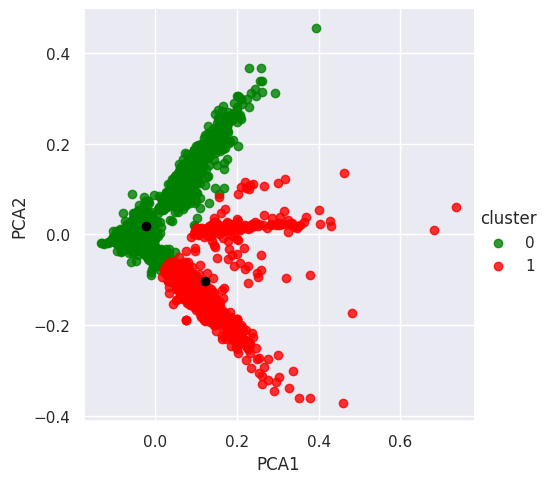

In [ ]:
#Plot our data
sns.set()

sns.lmplot(x="PCA1", y="PCA2", data=pca_df,
palette=["green", "red"], hue="cluster", fit_reg=False)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="black", label="Cluster Centroids")


plt.show()

In [ ]:
#Let's Try With DBSCAN
dbscan = DBSCAN()
dbscan.fit_predict(reduced_data)
Y = dbscan.labels_